In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from google.colab import files

1. Calculate $x_k(t)$

In [ ]:
#calculate the fraction of class k 
def probability(list_k,N,s):
  lst = []
  for k in range(len(list_k)): 
    lst.append((np.exp(-k*s)*(list_k[k]))/N)

  return np.array(lst)/np.sum(lst)

2. Calculate $P(\tilde{n})$:

In [ ]:
#calculate the number of individuals for one generation
def one_generation(list_k, N, s, u):   
    #calculate the fraction of class k 
    frac_class_k = probability(list_k,N,s)

    #calculate the number of offspring from class k
    new_list_k = np.random.multinomial(N, frac_class_k)

    #calculate the number of individuals that will mutate with prob u
    list_mutate = []
    for i in new_list_k:
      list_mutate.append(np.random.binomial(i, u))

    #calculate for the number of individuals per class after mutation happened
    next_offspring_list = []
    for k in range(len(new_list_k)-1):
      next_offspring_list.append(new_list_k[k] + list_mutate[k+1] - list_mutate[k])

    #the last class k is appended outside the loop, since the last class cannot have mutation
    next_offspring_list.append(new_list_k[len(new_list_k)-1] + list_mutate[0])
    return next_offspring_list

3. Calculate $\bar{f}(t)$ after one generation:

In [ ]:
#calculate the average fitness after one generation
#k refers to classes
def evolution_after_one_gen(time, list_N, s, u, k):
  fitness_list = []

  #vary the size of population
  for N in list_N:
    #create the initial list for the number of individuals in each class
    list_k = np.random.multinomial(N, np.ones(k)/k)

    #let this evolve to t generations
    fitness_per_time_list = []
    for t in range(time):
      list_k = one_generation(list_k, N, s, u)

      #calculate average fitness after one generation
      ave_fitness = 0
      for j in range(len(list_k)):
        ave_fitness += (np.exp(-j*s)*list_k[j])/N

      #append the average fitness for different sizes of population
      fitness_per_time_list.append(ave_fitness) 
    fitness_list.append(fitness_per_time_list)
  return fitness_list

## Plot average fitness ($\bar{f}(t)$) as a function of N

In [ ]:
#number of classes
classes = 20

#value of S_0 diferent from zero and far from one
s = np.random.uniform(0.01,0.2)

#value of U diferent from zero and far from one
u = np.random.uniform(0.01,0.2)

In [ ]:
print('value of s:', s)
print('value of u:', u)

value of s: 0.05441404541617493
value of u: 0.08049358703377556


In [ ]:
#calculating the average fitness for each time step, for each N
realization = 20
time = 100
list_N = [5, 20, 100]

list_evo = []
for i in range(realization):
  evo = evolution_after_one_gen(time, list_N, s, u, classes)
  list_evo.append(evo)

In [ ]:
#take the mean and standard dev for each N
list_evo_mean = np.mean(list_evo, axis=0)
list_evo_std = np.std(list_evo, axis=0)

Plot average fitness as a function of time for different N

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

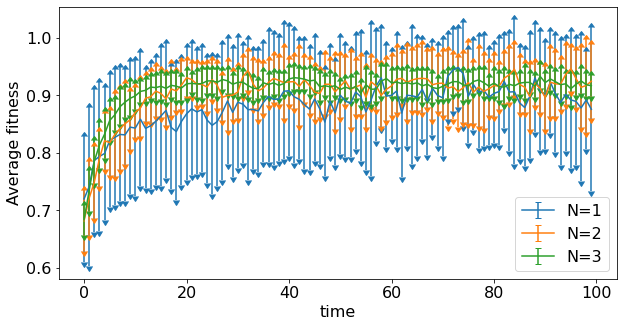

In [ ]:
plt.figure(figsize=(10,5))
for i in range(len(list_evo_mean)):
  plt.errorbar(np.arange(len(list_evo_mean[i])), list_evo_mean[i], yerr=list_evo_std[i], uplims=True,lolims=True, label = 'N={}'.format(list_N[i]))
  #plt.ylim(0.6, 1.2)
plt.xlabel('time')
plt.ylabel('Average fitness')
plt.legend(loc='lower right')
plt.savefig('exercise_f_01', dpi=300)
files.download('exercise_f_01.png')
plt.show()

Plot average fitness as a function of N

In [ ]:
#calculate average fitness after a lot of time/generations for different N
trials = 20
time = 300
#list of different sizes of population
list_N = np.arange(1, 1000, 1)

list_evo_N = []
for i in tqdm(range(trials)):
  evo_N = evolution_after_one_gen(time, list_N, s, u, classes)
  list_evo_N.append(evo_N)

list_evo_N_mean = np.mean(list_evo_N, axis=0)
list_evo_N_std = np.std(list_evo_N, axis=0)

100%|██████████| 20/20 [21:16<00:00, 63.82s/it]


In [ ]:
#calculate mean and standard dev for each N
mean_list = []
std_list = []
for i in range(len(list_evo_N_mean)):
  mean_ = list_evo_N_mean[i][-1]
  mean_list.append(mean_)
  std_ = list_evo_N_std[i][-1]
  std_list.append(std_)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

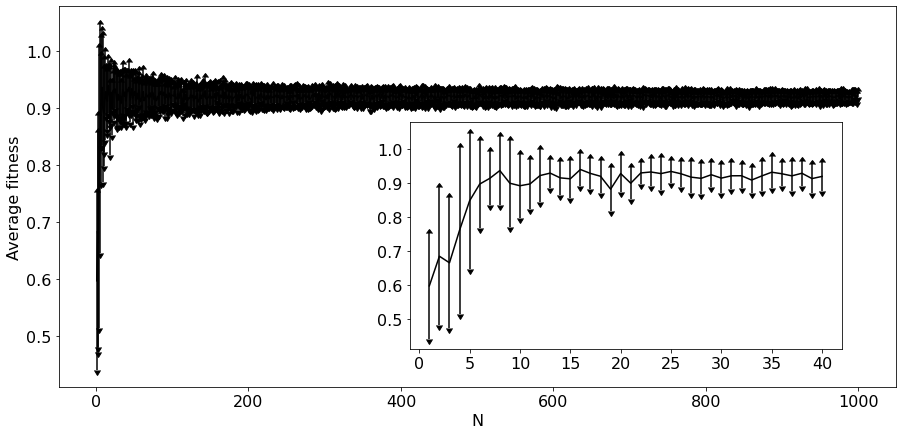

In [ ]:
slicer=40
fig, ax1 = plt.subplots(figsize=(15,7))

#plotting inset
#these are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.45, 0.2, 0.4, 0.45]
ax2 = fig.add_axes([left, bottom, width, height])


plt.rcParams['font.size'] = '16'
ax1.errorbar(list_N, mean_list, yerr=std_list, uplims=True,lolims=True,color='black')

ax2.errorbar(list_N[:slicer], mean_list[:slicer], yerr=std_list[:slicer], uplims=True,lolims=True,color='black')


ax1.set_xlabel('N')
ax1.set_ylabel('Average fitness')


plt.savefig('exercise_f_02', dpi=300)
files.download('exercise_f_02.png')
plt.show()